## Targetweight = sum of all cweights


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import copy
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import sys
import random
sys.path.append('..')  # Add this line to include the directory above

###############
# User inputs #
###############
file_name = "/content/drive/MyDrive/Colab Notebooks/data/2024-06-19_anon_nft_balances.csv"
user_data = pd.read_csv(file_name)

print(user_data.sum())

expert_token_Ids = [f"tokenId {num}" for num in [11, 15, 17, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45]]
graduates_tokenIds = [f"tokenId {num}" for num in  [1,2,3,4,5,6,7,8,9,10]]
student_tokenIds = [f"tokenId {num}" for num in [12, 13, 14, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,]]

 # Initialize the result dictionary with the same structure as nft_score
initial_nft_supply = {
    'expert': {},
    'graduate': {},
    'student': {}
}

# Calculate sum for each token column (excluding 'Id' column)
token_sums = user_data.sum()

# Sort tokens into categories based on predefined lists
for token_id in expert_token_Ids:
    if token_id in token_sums.index:
        initial_nft_supply['expert'][token_id] = int(token_sums[token_id])

for token_id in graduates_tokenIds:
    if token_id in token_sums.index:
        initial_nft_supply['graduate'][token_id] = int(token_sums[token_id])

for token_id in student_tokenIds:
    if token_id in token_sums.index:
        initial_nft_supply['student'][token_id] = int(token_sums[token_id])

nft_score = {
    'expert': {
        'tokenId 11': 20,  # Expert tokens
        'tokenId 15': 16,
        'tokenId 17': 16,
        'tokenId 31': 15,
        'tokenId 32': 15,
        'tokenId 33': 15,
        'tokenId 34': 15,
        'tokenId 35': 15,
        'tokenId 36': 15,
        'tokenId 37': 15,
        'tokenId 38': 15,
        'tokenId 39': 18,
        'tokenId 40': 1,
        'tokenId 41': 4,
        'tokenId 42': 18,
        'tokenId 43': 16,
        'tokenId 45': 10
    },
    'graduate': {
        'tokenId 1': 7,   # Graduate tokens
        'tokenId 2': 0,
        'tokenId 3': 7,
        'tokenId 4': 0,
        'tokenId 5': 7,
        'tokenId 6': 0,
        'tokenId 7': 7,
        'tokenId 8': 0,
        'tokenId 9': 7,
        'tokenId 10': 0
    },
    'student': {
        'tokenId 12': 10,  # Student tokens
        'tokenId 13': 10,
        'tokenId 14': 10,
        'tokenId 16': 1,
        'tokenId 18': 5,
        'tokenId 19': 1,
        'tokenId 20': 3,
        'tokenId 21': 3,
        'tokenId 22': 1,
        'tokenId 23': 10,
        'tokenId 24': 10,
        'tokenId 25': 10,
        'tokenId 26': 10,
        'tokenId 27': 10,
        'tokenId 28': 10,
        'tokenId 29': 10
    }
}

print(expert_token_Ids)
print(graduates_tokenIds)
print(student_tokenIds)
print(initial_nft_supply)
print(nft_score)

# No. of loops to run
iterations = 101
# Amount to increment by each loop TODO: Make range for rand()
increment = 1

colors = {'expert': 'blue', 'graduate': 'green', 'student': 'red'}
line_styles = {'NFT1': '--', 'NFT2': ':'}

##################################
## Store the evolution of values #
##################################

# Copy of nft_supply for use in calculations
nft_supply = copy.deepcopy(initial_nft_supply)

# Initialize lists to store simulation results
target_weights = []
total_amounts = defaultdict(list)
category_weights = defaultdict(list)
multipliers = defaultdict(list)

# Initialize nested defaultdicts for NFT tracking
nft_supplies = defaultdict(lambda: defaultdict(list))
nft_weights = defaultdict(lambda: defaultdict(list))
nft_weight_increases = defaultdict(lambda: defaultdict(list))

################
## Simulation ##
################

# Simulation over iterations
for i in range(iterations):
    # Increase the number of NFTs and store the sum
    for category in nft_supply:
        for nft_type in nft_supply[category]:
            # Test if first round, if so don't increment
            if i != 0:
                # Randomly select a category (outer key)
                category = random.choice(list(nft_supply.keys()))
                 # Randomly select an NFT type from the chosen category
                nft_type = random.choice(list(nft_supply[category].keys()))
                # Increment the selected NFT value
                nft_supply[category][nft_type] += increment
            # Store supply
            nft_supplies[category][nft_type].append(nft_supply[category][nft_type])

    # Calculate and store category weights
    category_weight = {}
    for category in nft_supply:
        total = 0
        for nft_type in nft_supply[category]:
          total += nft_supply[category][nft_type] * nft_score[category][nft_type]
        category_weight[category] = total
        # Store weight
        category_weights[category].append(total)

    # Calculate and store target weight
    target_weight = category_weight['expert'] + category_weight['graduate'] + category_weight['student']
    target_weights.append(target_weight)

    # Calculate and store total amounts per category
    for category in nft_supply:
        total = sum(nft_supply[category].values())
        total_amounts[category].append(total)

    # Calculate multipliers and new NFT weights
    for category in nft_supply:
        if category_weight[category] != 0:
            multiplier = target_weight / category_weight[category]
        else:
            multiplier = target_weight # changed float('inf') to = target_weight for clarity
        multipliers[category].append(multiplier)

        # Update NFT weights based on multiplier
        for nft_type in nft_score[category]:
            new_weight = nft_score[category][nft_type] * multiplier
            nft_weights[category][nft_type].append(new_weight)

            if i != 0:
              diff = new_weight - nft_weights[category][nft_type][-1]
              nft_weight_increases[category][nft_type].append(diff)


Id            124251
tokenId 1        243
tokenId 2        114
tokenId 3        188
tokenId 4         90
tokenId 5        136
tokenId 6         56
tokenId 7        105
tokenId 8         38
tokenId 9         98
tokenId 10        49
tokenId 11         4
tokenId 12         0
tokenId 13        21
tokenId 14         1
tokenId 15         7
tokenId 16        33
tokenId 17        12
tokenId 18        23
tokenId 19        11
tokenId 20        57
tokenId 21        21
tokenId 22       146
tokenId 23        13
tokenId 24         0
tokenId 25         4
tokenId 26         6
tokenId 27         7
tokenId 28        18
tokenId 29         8
tokenId 30         6
tokenId 31         0
tokenId 32         1
tokenId 33         1
tokenId 34         2
tokenId 35         1
tokenId 36         1
tokenId 37         0
tokenId 38         1
tokenId 39         5
tokenId 40         3
tokenId 41         0
tokenId 42         7
tokenId 43         0
tokenId 44         0
tokenId 45         0
dtype: int64
['tokenId 11', 'token

## Results Verification

In [13]:
##################
## Verification ##
##################

for i in [0, iterations // 2, iterations - 1]:
    print(f"\nIteration {i}:")
    print("Target Weight:", target_weights[i])

    print("Total Supplies:")
    for category in total_amounts:
        print(f"  {category}: {total_amounts[category][i]}")
    print("Category Weights:")
    for category in category_weights:
        print(f"  {category}: {category_weights[category][i]}")
    print("Multipliers:")
    for category in multipliers:
        print(f"  {category}: {multipliers[category][i]}")

    for category in multipliers:
        if(category_weights[category][i] * multipliers[category][i] == target_weights[i]):
            print("SUCESSS")
        else:
            print("FAILURE")

        print(f"{category_weights[category][i]} * {multipliers[category][i]} = {target_weights[i]}")



Iteration 0:
Target Weight: 7417
Total Supplies:
  expert: 45
  graduate: 1117
  student: 369
Category Weights:
  expert: 708
  graduate: 5390
  student: 1319
Multipliers:
  expert: 10.475988700564972
  graduate: 1.3760667903525046
  student: 5.623199393479909
SUCESSS
708 * 10.475988700564972 = 7417
SUCESSS
5390 * 1.3760667903525046 = 7417
SUCESSS
1319 * 5.623199393479909 = 7417

Iteration 50:
Target Weight: 25371
Total Supplies:
  expert: 758
  graduate: 1805
  student: 1118
Category Weights:
  expert: 10964
  graduate: 7749
  student: 6658
Multipliers:
  expert: 2.3140277271068954
  graduate: 3.2740998838559814
  student: 3.8106037849203966
SUCESSS
10964 * 2.3140277271068954 = 25371
SUCESSS
7749 * 3.2740998838559814 = 25371
SUCESSS
6658 * 3.8106037849203966 = 25371

Iteration 100:
Target Weight: 42845
Total Supplies:
  expert: 1503
  graduate: 2549
  student: 1779
Category Weights:
  expert: 21441
  graduate: 10206
  student: 11198
Multipliers:
  expert: 1.998274334219486
  graduate

## Results

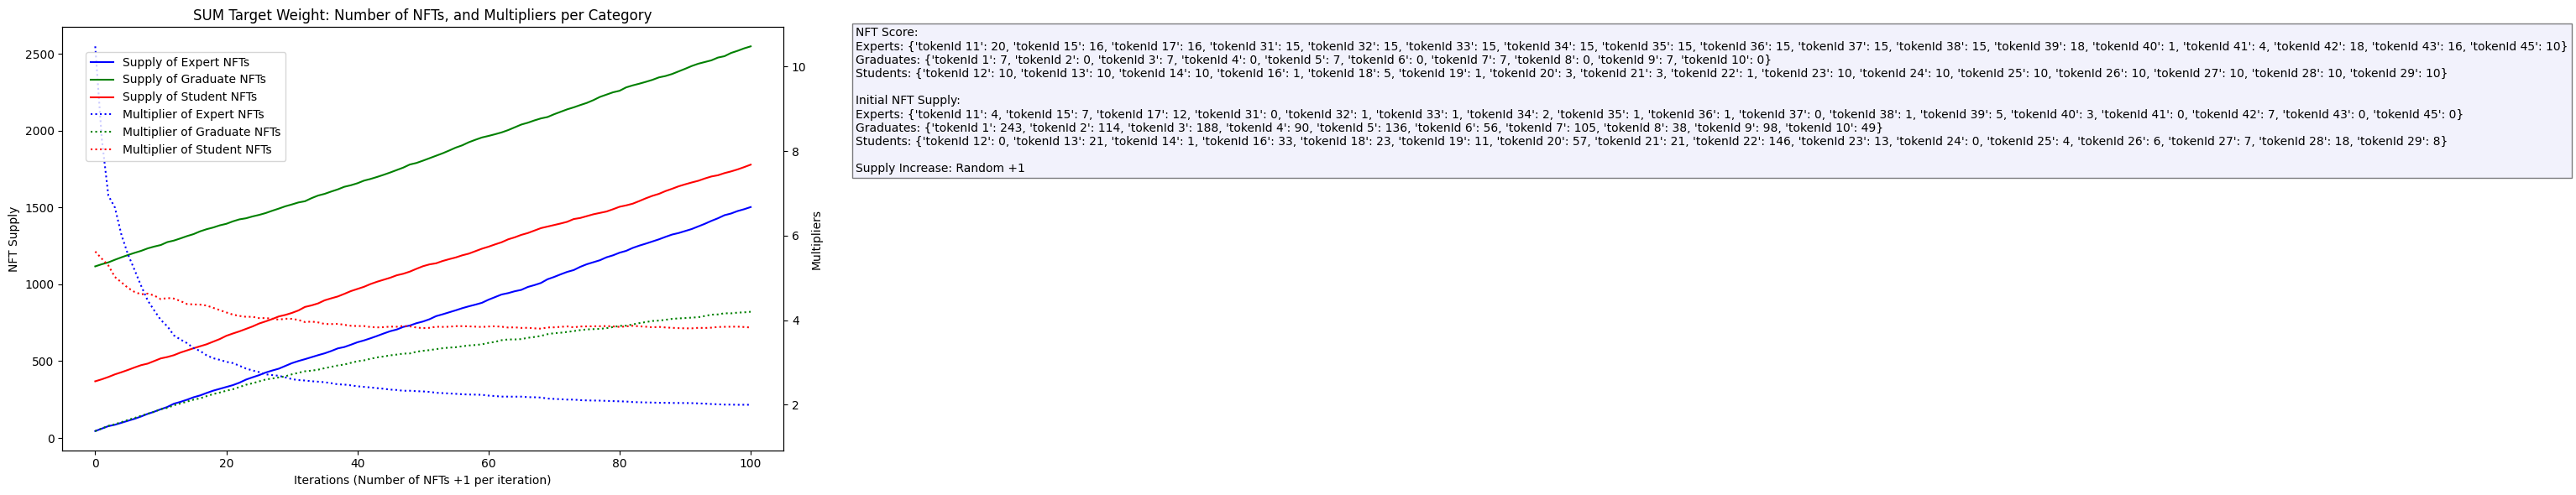

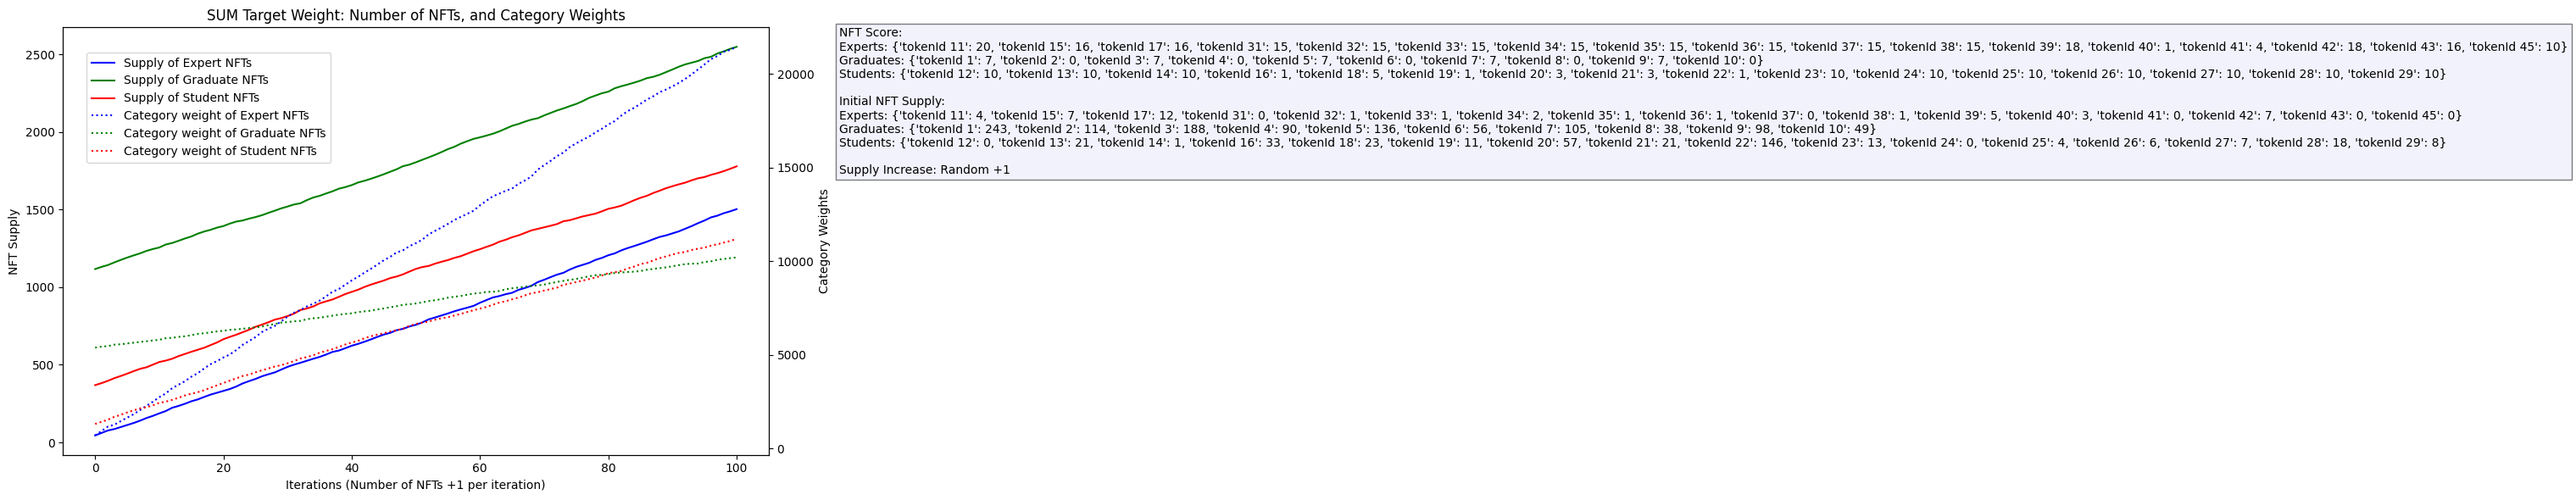

<ipython-input-20-9bdda1d59c65>:209: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))


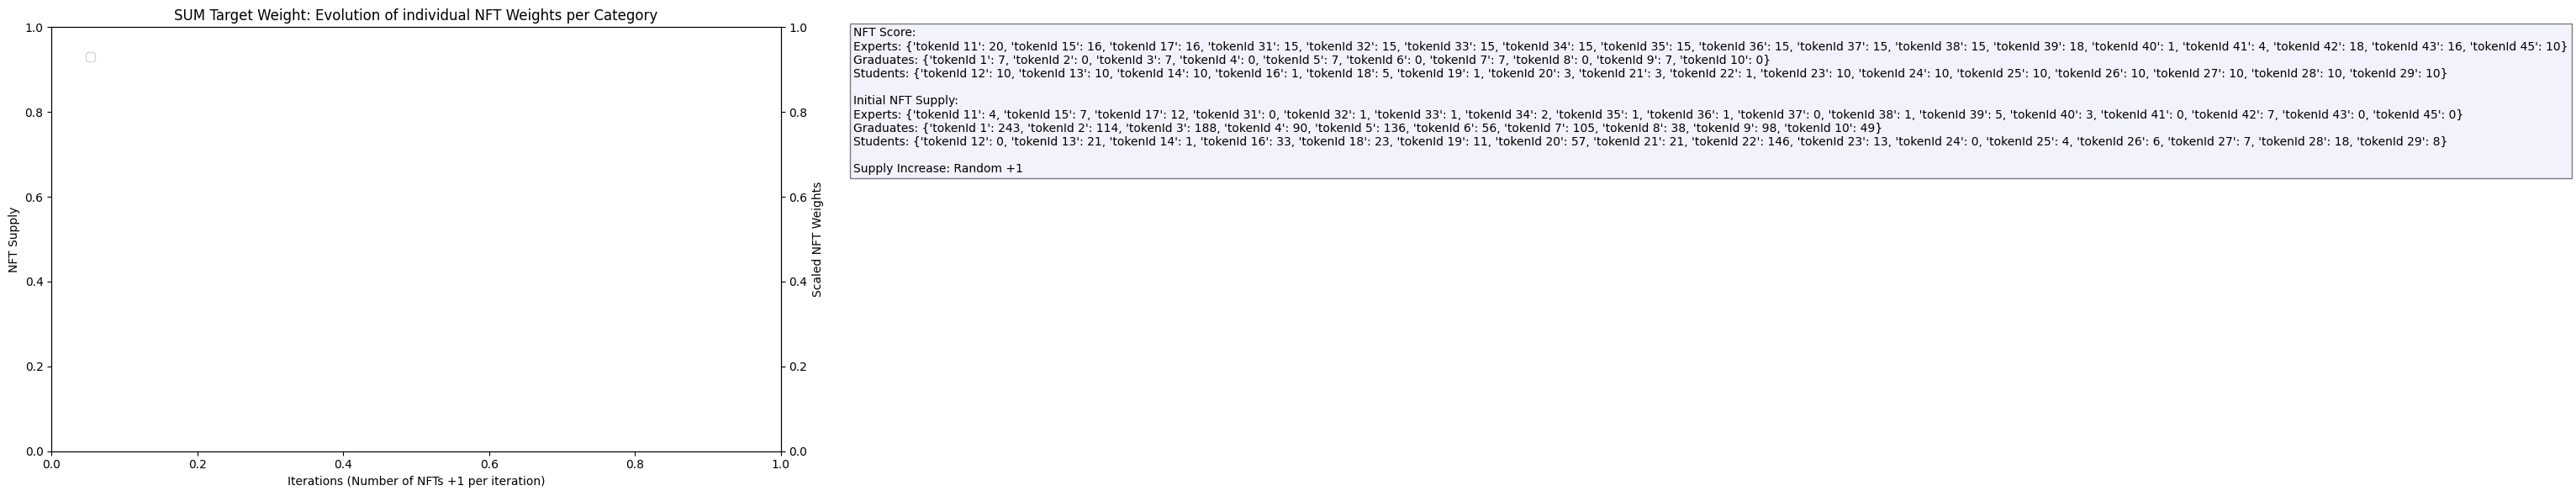

In [20]:
#############
## RESULTS ##
#############

#print("Multipliers")
#print(multipliers)
#print("Category weights")
#print(category_weights)
#print("New weights")
#print(new_nft_weights)

############
## GRAPHS ##
############

### Text box for graph clarity ###
textbox = '\n'.join([
    'NFT Score:',
    f"Experts: {nft_score['expert']}",
    f"Graduates: {nft_score['graduate']}",
    f"Students: {nft_score['student']}",
    '',
    'Initial NFT Supply:',
    f"Experts: {initial_nft_supply['expert']}",
    f"Graduates: {initial_nft_supply['graduate']}",
    f"Students: {initial_nft_supply['student']}",
    '',
    'Supply Increase: Random +1',
])

### Multipliers ###
# print the multiplier graphs

# Create the total weights plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

# Plot target_weight and number of NFTs on the primary y-axis (ax1)
#ax1.plot(range(iterations), target_weights, label='Target Weight', color='black', linestyle='--')
for category in total_amounts:
    ax1.plot(range(iterations), total_amounts[category], label=f'Supply of {category.capitalize()} NFTs', color=colors[category])

# Set labels for the primary y-axis
ax1.set_xlabel('Iterations (Number of NFTs +1 per iteration)')
ax1.set_ylabel('NFT Supply')
ax1.set_title('SUM Target Weight: Number of NFTs, and Multipliers per Category')

# Create the secondary y-axis (ax2) for multipliers
ax2 = ax1.twinx()

# Plot multipliers for each category on the secondary y-axis (ax2)
for category in multipliers:
    ax2.plot(range(iterations), multipliers[category], label=f'Multiplier of {category.capitalize()} NFTs', color=colors[category], linestyle=':')

# Set labels for the secondary y-axis
ax2.set_ylabel('Multipliers')

# Combine legends from both y-axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()

### Category weights ###
# Print the category weights graphs

# Create the total weights plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

# Plot target_weight and number of NFTs on the primary y-axis (ax1)
#ax1.plot(range(iterations), target_weights, label='Target Weight', color='black', linestyle='--')
for category in total_amounts:
    ax1.plot(range(iterations), total_amounts[category], label=f'Supply of {category.capitalize()} NFTs', color=colors[category])

# Set labels for the primary y-axis
ax1.set_xlabel('Iterations (Number of NFTs +1 per iteration)')
ax1.set_ylabel('NFT Supply')
ax1.set_title('SUM Target Weight: Number of NFTs, and Category Weights')

# Create the secondary y-axis (ax2) for multipliers
ax2 = ax1.twinx()

# Plot multipliers for each category on the secondary y-axis (ax2)
for category in category_weights:
    ax2.plot(range(iterations), category_weights[category], label=f'Category weight of {category.capitalize()} NFTs', color=colors[category], linestyle=':')

# Set labels for the secondary y-axis
ax2.set_ylabel('Category Weights')

# Combine legends from both y-axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()

#### NFT1 supply vs NFT1 weight ####
###### DUE TO RANDOM, PICKING SINGLE NFT DOES NOT MAKE SENSE ######
## Print the weight and number of the NFT being changed
#
## Create the individual weights plot
#fig, ax1 = plt.subplots(figsize=(10, 6))
#
#bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
#fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
#verticalalignment='top')
#
## Plot target_weight and number of NFTs on the primary y-axis (ax1)
#ax1.plot(range(iterations), nft_supplies['expert']['NFT1'], label='Expert NFT1 Supply', color=colors['expert'])
#
## Set labels for the primary y-axis
#ax1.set_xlabel('Iterations (Number of NFTs +1 per iteration)')
#ax1.set_ylabel('NFT Supply')
#ax1.set_title('SUM Target Weight: Expert NFT1 weight vs amount')
#
## Create the secondary y-axis (ax2) for multipliers
#ax2 = ax1.twinx()
#ax2.set_ylabel('Scaled NFT Weights')
#
## Plot individual NFT weight
#ax2.plot(range(iterations), nft_weights['expert']['NFT1'], label='Expert NFT1 Weight', color=colors['expert'], linestyle=line_styles['NFT1'])
#
#fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
#
## Show the plot
#plt.tight_layout()
#plt.show()

#### NFT1 supply vs NFT1 and NFT2 weight ####
###### DUE TO RANDOM, PICKING SINGLE NFT DOES NOT MAKE SENSE ######
## Print the weight and number of the NFT being changed
#
## Create the individual weights plot
#fig, ax1 = plt.subplots(figsize=(10, 6))
#
#bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
#fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
#verticalalignment='top')
#
## Plot target_weight and number of NFTs on the primary y-axis (ax1)
#ax1.plot(range(iterations), nft_supplies['expert']['NFT1'], label='Expert NFT1 Supply', color=colors['expert'])
#
## Set labels for the primary y-axis
#ax1.set_xlabel('Iterations (Number of NFTs +1 per iteration)')
#ax1.set_ylabel('NFT Supply')
#ax1.set_title('SUM Target Weight: Expert NFT1 supply vs NFT1 and 2 weight')
#
## Create the secondary y-axis (ax2) for multipliers
#ax2 = ax1.twinx()
#ax2.set_ylabel('Scaled NFT Weights')
#
## Plot individual NFT weight
#ax2.plot(range(iterations), nft_weights['expert']['NFT1'], label='Expert NFT1 Weight', color=colors['expert'], linestyle=line_styles['NFT1'])
#ax2.plot(range(iterations), nft_weights['expert']['NFT2'], label='Expert NFT2 Weight', color=colors['expert'], linestyle=line_styles['NFT2'])
#
#fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
#
## Show the plot
#plt.tight_layout()
#plt.show()

#### Individual NFT weights ####
# Print the weights of all NFTs over time

# Create the individual weights plot
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

# Plot target_weight and number of NFTs on the primary y-axis (ax1)
for category in nft_supplies:
    for nft_type in nft_supplies[category]:
        values = nft_supplies[category][nft_type]
        # TODO WHY ARE THERE MISSING TOKEN ID'S
        try:
          ax2.plot(range(iterations), values, label=f'{category} - {nft_type}', color=colors[category], linestyle=line_styles[nft_type])
        except:
          continue

# Set labels for the primary y-axis
ax1.set_xlabel('Iterations (Number of NFTs +1 per iteration)')
ax1.set_ylabel('NFT Supply')
ax1.set_title('SUM Target Weight: Evolution of individual NFT Weights per Category')

# Create the secondary y-axis (ax2) for multipliers
ax2 = ax1.twinx()
ax2.set_ylabel('Scaled NFT Weights')

# Plot individual NFT weights
for category in nft_weights:
    for nft_type in nft_weights[category]:
        values = nft_weights[category][nft_type]
        # TODO WHY ARE THERE MISSING TOKEN ID'S
        try:
          ax2.plot(range(iterations), values, label=f'{category} - {nft_type}', color=colors[category], linestyle=line_styles[nft_type])
        except:
          continue

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()

#### Scarce NFT vs common NFT ####
## Print the weights of all NFTs over time
#
## Create the individual weights plot
#fig, ax1 = plt.subplots(figsize=(10, 6))
#
#bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
#fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
#verticalalignment='top')
#
## Plot target_weight and number of NFTs on the primary y-axis (ax1)
#ax1.plot(range(iterations), nft_supplies['expert']['NFT1'], label='Expert NFT1 Supply', color=colors['expert'])
#ax1.plot(range(iterations), nft_supplies['graduate']['NFT2'], label='Graduate NFT2 Supply', color=colors['graduate'])
#ax1.plot(range(iterations), nft_supplies['student']['NFT2'], label='Student NFT2 Supply', color=colors['student'])
#
## Set labels for the primary y-axis
#ax1.set_xlabel('Iterations (Number of NFTs +1 per iteration)')
#ax1.set_ylabel('NFT Supply')
#ax1.set_title('SUM Target Weight: Evolution of scarce vs common NFTs')
#
## Create the secondary y-axis (ax2) for multipliers
#ax2 = ax1.twinx()
#ax2.set_ylabel('Scaled NFT Weights')
#
## Plot individual NFT weights
#ax2.plot(range(iterations), nft_weights['expert']['NFT1'], label='Expert NFT1 Weight', color=colors['expert'], linestyle=line_styles['NFT1'])
#ax2.plot(range(iterations), nft_weights['graduate']['NFT2'], label='Graduate NFT2 Weight', color=colors['graduate'], linestyle=line_styles['NFT2'])
#ax2.plot(range(iterations), nft_weights['student']['NFT2'], label='Student NFT2 Weight', color=colors['student'], linestyle=line_styles['NFT2'])
#
#
#fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
#
## Show the plot
#plt.tight_layout()
#plt.show()
#
##### Weight increases vs previous ####
#fig, ax1 = plt.subplots(figsize=(10, 6))
#
#bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
#fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
#verticalalignment='top')
#
#ax1.stackplot(range(iterations -1), nft_weight_increases['expert']['NFT1'])
#ax1.stackplot(range(iterations -1), nft_weight_increases['expert']['NFT2'])
#
#ax1.set_xlabel('Iterations (Number of NFTs +1 per iteration)')
#ax1.set_ylabel('Scaled NFT Weight increases')
#ax1.set_title('Weight increases per iteration')
#
#fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
#
## Show the plot
#plt.tight_layout()
#plt.show()